In [ ]:
# Sai Triveni Kottapalli
# ID - C00313481  

# Linear Regression

In this chapter, we will begin with a brief overview of the mathematics related to this well-known problem Linear Regression. After that, we will explore how linear models can be generalized to accommodate more complex patterns in data.

Let's start with the standard imports:

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## Simple Linear Regression

The most familiar linear regression, a straight-line fit to data.
A straight-line fit is a model in the form:
$$
y = ax + b
$$
where $a$ is known as the *slope*, and $b$ is known as the *intercept*.

In [3]:
# changed x = 10 * rng.rand(50)
# y = 2 * x - 5 + rng.randn(50) to 
# x = 20 * rng.rand(100)  
# y = 3 * x - 10 + rng.randn(100) 
# plotting scatter plot more efficiently by adding labels and changing colors

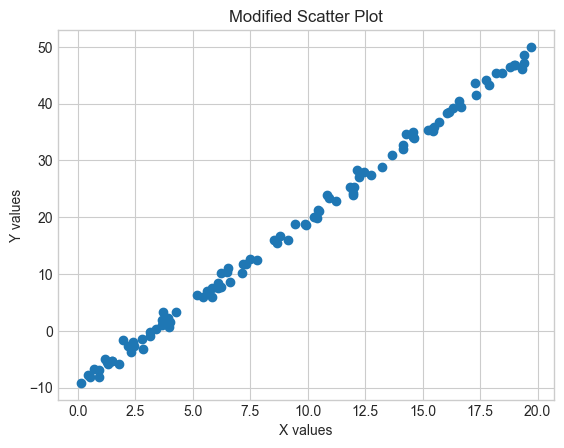

In [4]:
rng = np.random.RandomState(42)
x = 20 * rng.rand(100)  
y = 3 * x - 10 + rng.randn(100) 
plt.scatter(x, y)
plt.title("Modified Scatter Plot")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.show()

We can use Scikit-Learn's `LinearRegression` estimator to fit this data and construct the best-fit line.

In [5]:
# changed xfit = np.linspace(0, 10, 1000) to xfit = np.linspace(0, 20, 1000) 

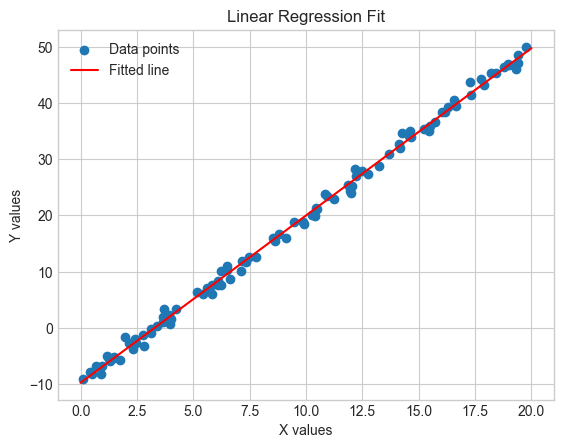

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)  
xfit = np.linspace(0, 20, 1000) 
yfit = model.predict(xfit[:, np.newaxis])  

plt.scatter(x, y, label="Data points")
plt.plot(xfit, yfit, color="red", label="Fitted line")
plt.title("Linear Regression Fit")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.legend()
plt.show()

The slope and intercept of the data are contained in the model's fit parameters, which in Scikit-Learn are always marked by a trailing underscore.
Here the relevant parameters are `coef_` and `intercept_`:

In [7]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.9770113386438486
Model intercept: -9.784903842453254


The `LinearRegression` estimator is much more versatile than simply performing straight-line fits. It can also manage multidimensional linear models represented by the equation:

$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$

In this equation, multiple variables $x$ are present. Geometrically, this process is similar to fitting a plane to points in three-dimensional space or fitting a hyperplane to points in higher dimensions.

Although the multidimensional aspect of these regressions makes them more challenging to visualize, we can still observe one of these fits in action by generating some example data using NumPy's matrix multiplication operator.

In [8]:
# changed X = 10 * rng.rand(100, 3)
# y = 0.5 + np.dot(X, [1.5, -2., 1.]) to 
# X = 15 * rng.rand(200, 4)  
# y = 1.0 + np.dot(X, [2.0, -3.0, 1.5, -0.5]) + rng.randn(200) * 0.5 

In [9]:
rng = np.random.RandomState(42)  
X = 15 * rng.rand(200, 4)  
y = 1.0 + np.dot(X, [2.0, -3.0, 1.5, -0.5]) + rng.randn(200) * 0.5 

model = LinearRegression(fit_intercept=True)
model.fit(X, y)

print(model.intercept_)
print(model.coef_)

0.8923449173220483
[ 1.99827546 -3.00249649  1.49659017 -0.48026128]


The `Linear Regression` estimator can be utilized to fit lines, planes, or hyperplanes to our data. While it may seem that this method is restricted to strictly linear relationships between variables, we can relax this limitation.

## Basis Function Regression

One effective approach to adapting linear regression for nonlinear relationships between variables is to use transformations based on *basis functions*.
The basic idea is to take our multidimensional linear model, represented as follows:


$$
y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3 + \cdots
$$
and construct the variables $x_1, x_2, x_3,$ and so on, from a single-dimensional input \( x \). Specifically, we define $x_n = f_n(x)$ where $f_n()$ is a function that transforms our data.


For example, if we set $f_n(x) = x^n$, our model becomes a polynomial regression:
$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$


It is important to note that this is still a linear model—the term "linearity" refers to the fact that the coefficients $a_n$ do not multiply or divide one another. 
What we've essentially done is take our one-dimensional $x$ values and project them into a higher dimension. This allows a linear fit to model more complex relationships between $x$ and $y$.

### Polynomial Basis Functions

This polynomial projection is useful enough that it is built into Scikit-Learn, using the `PolynomialFeatures` transformer:

In [10]:
# changed x = np.array([2, 3, 4]) to x = np.array([1, 2, 5])

In [11]:
from sklearn.preprocessing import PolynomialFeatures

x = np.array([1, 2, 5])
poly = PolynomialFeatures(3, include_bias=False)
transformed_x = poly.fit_transform(x[:, None])  
print(transformed_x)

[[  1.   1.   1.]
 [  2.   4.   8.]
 [  5.  25. 125.]]


We see here that the transformer has converted our one-dimensional array into a three-dimensional array, where each column contains the exponentiated value.

This new, higher-dimensional data representation can then be plugged into a linear regression.

With this transform in place, we can use the linear model to fit much more complicated relationships between $x$ and $y$. 
For example, here is a sine wave with noise:

In [12]:
# plotting scatter plot more efficiently by adding labels and changing colors

In [13]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())

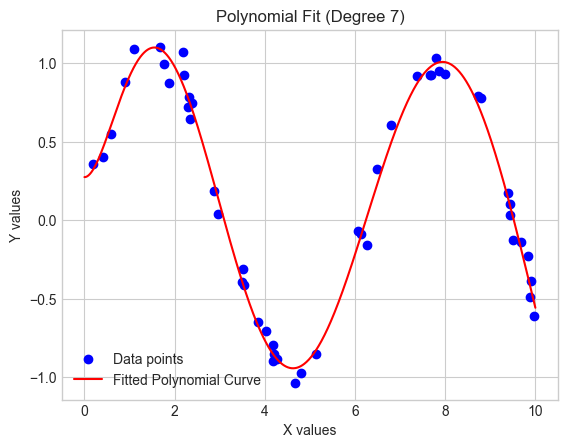

In [14]:
x = 10 * rng.rand(50)  
y = np.sin(x) + 0.1 * rng.randn(50) 

poly_model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)  
yfit = poly_model.predict(xfit[:, np.newaxis])  

plt.scatter(x, y, label="Data points", color='blue')
plt.plot(xfit, yfit, color='red', label="Fitted Polynomial Curve")
plt.title("Polynomial Fit (Degree 7)")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.legend()
plt.show()

Our linear model, through the use of seventh-order polynomial basis functions, can provide an excellent fit to this nonlinear data!

### Gaussian Basis Functions

Of course, other basis functions are possible.
For example, one useful pattern is to fit a model that is not a sum of polynomial bases, but a sum of Gaussian bases.
The result might look something like the following figure:

The shaded regions in the plot are the scaled basis functions, and when added together they reproduce the smooth curve through the data.
These Gaussian basis functions are not built into Scikit-Learn, but we can write a custom transformer that will create them, as shown here and illustrated in the following figure (Scikit-Learn transformers are implemented as Python classes; reading Scikit-Learn's source is a good way to see how they can be created):

In [15]:
# plotting scatter plot more efficiently by adding labels and changing colors

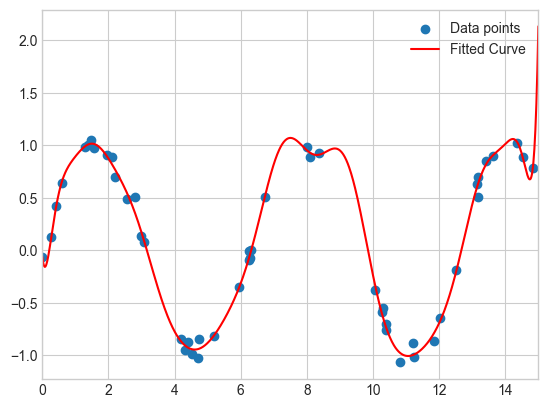

In [16]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    
    def __init__(self, N, width_factor=3.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width):
        return np.exp(-0.5 * ((x - y) / width) ** 2)  # Simplified the basis computation
        
    def fit(self, X, y=None):
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return np.array([self._gauss_basis(Xi, self.centers_, self.width_) for Xi in X])

# Generate data
rng = np.random.RandomState(1)
x = 15 * rng.rand(50)  
y = np.sin(x) + 0.1 * rng.randn(50)

# Fit model
gauss_model = make_pipeline(GaussianFeatures(25), LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)

# Predict
xfit = np.linspace(0, 15, 1000)
yfit = gauss_model.predict(xfit[:, np.newaxis])

# Plot
plt.scatter(x, y, label="Data points")
plt.plot(xfit, yfit, color="red", label="Fitted Curve")
plt.xlim(0, 15)
plt.legend()
plt.show()

I've included this example just to make clear that there is nothing magic about polynomial basis functions: if you have some sort of intuition into the generating process of your data that makes you think one basis or another might be appropriate, you can use that instead.

## Regularization

The introduction of basis functions into our linear regression makes the model much more flexible, but it also can very quickly lead to overfitting.
For example, the following figure shows what happens if we use a large number of Gaussian basis functions:

In [17]:
# changing the limits of x and y

(-2.0, 2.0)

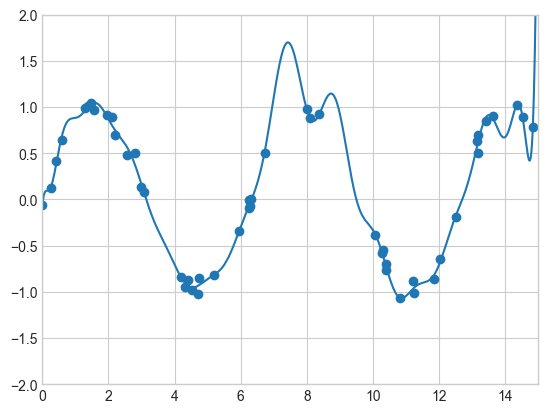

In [18]:
model = make_pipeline(GaussianFeatures(30),
                      LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 15)  
plt.ylim(-2, 2) 

With the data projected to the 30-dimensional basis, the model has far too much flexibility and goes to extreme values between locations where it is constrained by data.

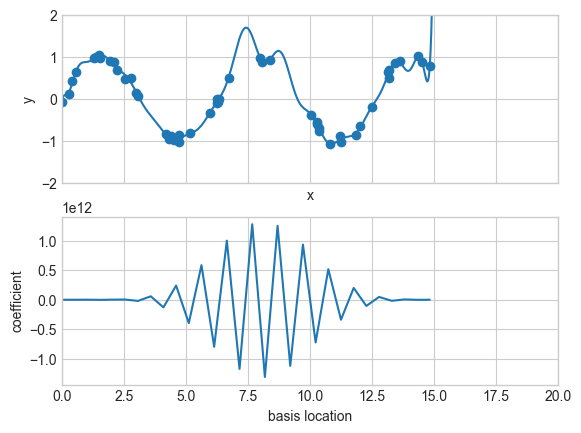

In [19]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-2, 2)) 
    
    if title:
        ax[0].set_title(title)

    ax[1].plot(model.steps[0][1].centers_,
               model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location', ylabel='coefficient', xlim=(0, 20)) 
    
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)


The lower panel of this figure illustrates the amplitude of the basis function at each location.

This behaviour is indicative of overfitting, which occurs when basis functions overlap; in such cases, the coefficients of adjacent basis functions can become excessively large and effectively cancel each other out. This type of behaviour is problematic, so it would be beneficial to impose limits on these large spikes by penalizing high values of the model parameters. 

This penalty is referred to as *regularization* and comes in several different forms.

### Ridge Regression ($L_2$ Regularization)

Perhaps the most common form of regularization is known as *ridge regression* or $L_2$ *regularization* (sometimes also called *Tikhonov regularization*).
This proceeds by penalizing the sum of squares (2-norms) of the model coefficients $\theta_n$. In this case, the penalty on the model fit would be: 
$$
P = \alpha\sum_{n=1}^N \theta_n^2
$$
where $\alpha$ is a free parameter that controls the strength of the penalty.
This type of penalized model is built into Scikit-Learn with the `Ridge` estimator (see the following figure):

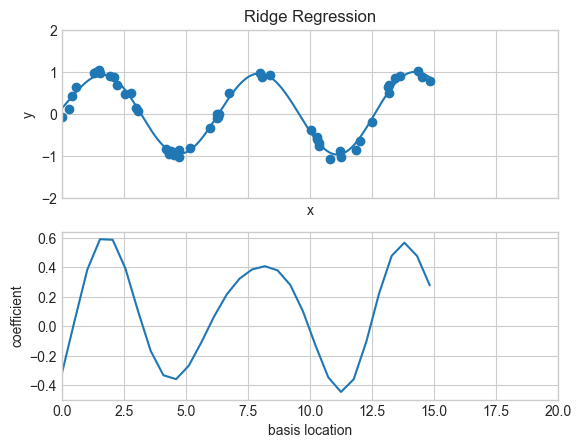

In [20]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.2))
basis_plot(model, title='Ridge Regression')

The $\alpha$ parameter is essentially a knob controlling the complexity of the resulting model.
In the limit $\alpha \to 0$, we recover the standard linear regression result; in the limit $\alpha \to \infty$, all model responses will be suppressed.
One advantage of ridge regression in particular is that it can be computed very efficiently—at hardly more computational cost than the original linear regression model.

### Lasso Regression ($L_1$ Regularization)

Another common type of regularization is known as *lasso regression* or *L~1~ regularization* involves penalizing the sum of absolute values (1-norms) of regression coefficients:
$$
P = \alpha\sum_{n=1}^N |\theta_n|
$$
Though this is conceptually very similar to ridge regression, the results can differ surprisingly. For example, due to its construction, lasso regression tends to favor *sparse models* where possible: that is, it preferentially sets many model coefficients to exactly zero.

We can see this behavior if we duplicate the previous example using L1-normalized coefficients (see the following figure):

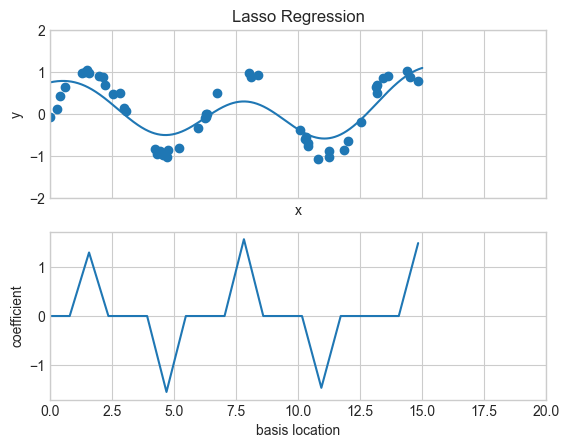

In [21]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(20), Lasso(alpha=0.01, max_iter=1000))
basis_plot(model, title='Lasso Regression')

With the lasso regression penalty, the majority of the coefficients are exactly zero, with the functional behavior being modeled by a small subset of the available basis functions.
As with ridge regularization, the $\alpha$ parameter tunes the strength of the penalty and should be determined via, for example, cross-validation.

## Example: Predicting California Housing Price Prediction

The California Housing dataset is commonly used for regression tasks to predict housing prices based on various features such as average income, housing age, number of rooms, and proximity to the ocean. In this example, we utilize Linear Regression to predict house prices based on these features. The model is trained on the dataset, evaluated using metrics like Mean Squared Error (MSE) and R² Score, and visualized with a scatter plot to compare predicted and actual prices. This task demonstrates how regression models can be applied to real-world datasets for predictive analysis.

In [22]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Loading the California Housing dataset

In [23]:
california_housing = fetch_california_housing()
X = california_housing.data  # Features
y = california_housing.target  # Target (house prices)

Split the dataset into training and test sets

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scaling the features

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Initialize and train the Linear Regression model

In [26]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

Make predictions

In [27]:
y_pred = model.predict(X_test_scaled)

Model evaluation

In [28]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 0.5558915986952443
R² Score: 0.5757877060324508


Print Predicted vs Actual Prices

In [29]:
print("\nPredicted Prices vs Actual Prices:")
for i in range(len(y_test)):
    print(f"Predicted: {y_pred[i]:.2f} | Actual: {y_test[i]:.2f}")


Predicted Prices vs Actual Prices:
Predicted: 0.72 | Actual: 0.48
Predicted: 1.76 | Actual: 0.46
Predicted: 2.71 | Actual: 5.00
Predicted: 2.84 | Actual: 2.19
Predicted: 2.60 | Actual: 2.78
Predicted: 2.01 | Actual: 1.59
Predicted: 2.65 | Actual: 1.98
Predicted: 2.17 | Actual: 1.57
Predicted: 2.74 | Actual: 3.40
Predicted: 3.92 | Actual: 4.47
Predicted: 0.94 | Actual: 1.23
Predicted: 1.90 | Actual: 2.54
Predicted: 1.76 | Actual: 2.15
Predicted: 2.25 | Actual: 2.21
Predicted: 2.54 | Actual: 2.20
Predicted: 1.92 | Actual: 1.36
Predicted: 2.39 | Actual: 1.78
Predicted: 2.01 | Actual: 1.88
Predicted: 2.23 | Actual: 1.40
Predicted: 1.12 | Actual: 1.38
Predicted: 2.93 | Actual: 4.25
Predicted: 2.66 | Actual: 4.06
Predicted: 1.88 | Actual: 1.39
Predicted: 3.35 | Actual: 5.00
Predicted: 2.24 | Actual: 1.62
Predicted: 0.90 | Actual: 0.51
Predicted: 1.84 | Actual: 1.51
Predicted: 1.64 | Actual: 0.95
Predicted: 1.92 | Actual: 2.04
Predicted: 3.25 | Actual: 3.62
Predicted: 1.57 | Actual: 0.85
Pre

Plot Actual vs Predicted prices

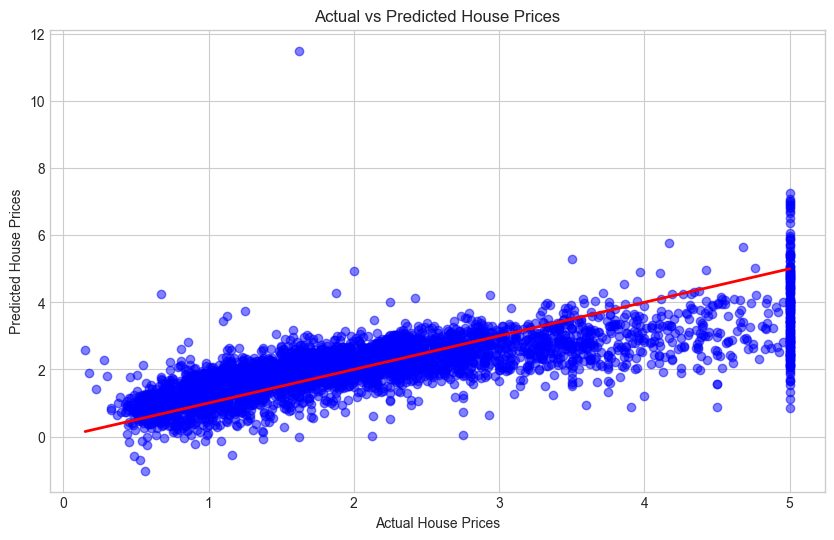

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()